In [1]:
import pandas as pd
import numpy as np

In [2]:
ball_by_ball = pd.read_excel('D:/EDA/Workspace/IPL Data/Ball_by_Ball.xlsx')
match = pd.read_excel('D:/EDA/Workspace/IPL Data/Match.xlsx')
player = pd.read_excel('D:/EDA/Workspace/IPL Data/Player.xlsx')
player_match = pd.read_excel('D:/EDA/Workspace/IPL Data/Player_Match.xlsx')
season = pd.read_excel('D:/EDA/Workspace/IPL Data/Season.xlsx')
team = pd.read_excel('D:/EDA/Workspace/IPL Data/Team.xlsx')

# PS : Number of matches won by each team in IPL history

In [3]:
## Extacting total matches won by each team    
won_match = pd.crosstab(index= match['Match_Winner_Id'],columns='Total_Matches_winned').reset_index()

## Getting the team name instead of match winner id
team_wise_win = pd.merge(won_match,team[['Team_Id','Team_Short_Code']],left_on='Match_Winner_Id',right_on='Team_Id')

## Selecting the columns Team_Short_code & Count
Team_wise_win = team_wise_win[['Team_Short_Code','Total_Matches_winned']]

## Sorting Team_wise_win table by Total_Matches_winned in descending order
Team_wise_win.sort_values(by = 'Total_Matches_winned', ascending = False)

,Team_Short_Code,Total_Matches_winned
6,MI,80
2,CSK,79
1,RCB,70
0,KKR,68
3,KXIP,63
4,RR,63
5,DD,56
10,SRH,34
7,DC,29
9,PW,12


# PS -- Total number of matches played by each team

In [4]:
## Extact no of matches played by each team in home town and away from home town
total_match_at_home = pd.crosstab(index=match['Team_Name_Id'],columns='Home_Match').reset_index()
total_match_at_away = pd.crosstab(index=match['Opponent_Team_Id'], columns='Away_Match').reset_index()

## Merge total_match_at_home and total_match_at_away table (to combine home_town and away_home_town)
total = pd.merge(total_match_at_home,total_match_at_away,left_on='Team_Name_Id',right_on='Opponent_Team_Id')

## Adding two columns
total['Total'] = total['Home_Match'] + total['Away_Match']

## Extact required columns
Total = total[['Team_Name_Id','Total']]

## Merge team_wise_win and total table
Range = pd.merge(team_wise_win,Total[['Team_Name_Id','Total']],left_on='Team_Id',right_on='Team_Name_Id')
Range['Percentage_of_win'] = round(((Range['Total_Matches_winned']/Range['Total'])*100),2)

## Extacting Requied columns
Total_match_team = Range[['Team_Short_Code','Total_Matches_winned','Total','Percentage_of_win']]
Total_match_team.sort_values(by = 'Percentage_of_win',ascending = False)

,Team_Short_Code,Total_Matches_winned,Total,Percentage_of_win
2,CSK,79,131,60.31
6,MI,80,140,57.14
12,GL,9,16,56.25
10,SRH,34,62,54.84
4,RR,63,118,53.39
0,KKR,68,132,51.52
1,RCB,70,139,50.36
3,KXIP,63,134,47.01
8,KTK,6,14,42.86
5,DD,56,133,42.11


In [5]:
# Two way cross table
# No.of matches won by each team while batting first and chasing
Team_wise_win_type = pd.crosstab(index=match['Match_Winner_Id'],columns=match['Win_Type']).reset_index()

Team_wise_win_type =pd.merge(Team_wise_win_type,team[['Team_Id','Team_Short_Code']],
                             left_on='Match_Winner_Id',right_on='Team_Id')

Team_wise_win_type = Team_wise_win_type[['Team_Short_Code','by runs','by wickets','Tie']]

# Rename the columns
Team_wise_win_type = Team_wise_win_type.rename(columns = {'Team_Short_Code':'Team','by runs':'Batting First',
                                                          'by wickets':'Chasing','Tie':'Match Tied'})
Team_wise_win_type

,Team,Batting First,Chasing,Match Tied
0,KKR,29,39,0
1,RCB,27,42,1
2,CSK,46,33,0
3,KXIP,28,33,2
4,RR,23,38,2
5,DD,18,38,0
6,MI,43,37,0
7,DC,18,11,0
8,KTK,2,4,0
9,PW,6,6,0


In [6]:
## We can create the two way cross tables using the groupby function
team_wise_win_type = match.groupby(['Match_Winner_Id','Win_Type']).size().reset_index()

# Converting the long data to wide date
Final_data = team_wise_win_type.pivot('Match_Winner_Id','Win_Type',0)

#  Filling the NaN value with zero
Final_data = Final_data.fillna(0)

# Total matches won by team
Final_data['Total'] = Final_data['Tie'] + Final_data['by runs'] + Final_data['by wickets']
Final_data

Win_Type,Tie,by runs,by wickets,Total
Match_Winner_Id,,,,
1.0,0.0,29.0,39.0,68.0
2.0,1.0,27.0,42.0,70.0
3.0,0.0,46.0,33.0,79.0
4.0,2.0,28.0,33.0,63.0
5.0,2.0,23.0,38.0,63.0
6.0,0.0,18.0,38.0,56.0
7.0,0.0,43.0,37.0,80.0
8.0,0.0,18.0,11.0,29.0
9.0,0.0,2.0,4.0,6.0


In [7]:
## PS -- Win type by each team in each season
# Three Way Cross Table(Two rows, one col)

season_wise_team_wise = pd.crosstab(index=[match['Match_Winner_Id'],match['Season_Id']],
                                    columns=match['Win_Type'])
season_wise_team_wise

Win_Type                   Tie  by runs  by wickets
Match_Winner_Id Season_Id                          
1.0             1            0        4           2
                2            0        1           2
                3            0        4           3
                4            0        4           4
                5            0        6           6
                6            0        2           4
                7            0        4           7
                8            0        2           5
                9            0        2           6
2.0             1            0        2           2
                2            0        3           6
                3            0        1           7
                4            0        3           7
                5            0        4           4
                6            1        5           3
                7            0        1           4
                8            0        3           5
                9            0        5           4
3.0             1            0        5           4
                2            0        6           2
                3            0        5           4
                4            0        8           3
                5            0        5           5
                6            0        7           5
                7            0        3           7
                8            0        7           3
4.0             1            0        5           5
                2            0        3           4
                3            1        0           3
                4            0        4           3
...                        ...      ...         ...
6.0             4            0        2           2
                5            0        2           9
                6            0        1           2
                7            0        0           2
                8            0        2           3
                9            0        2           5
7.0             1            0        2           5
                2            0        4           1
                3            0        8           3
                4            0        5           5
                5            0        3           7
                6            0        9           4
                7            0        3           4
                8            0        7           3
                9            0        2           5
8.0             1            0        0           2
                2            0        5           4
                3            0        5           3
                4            0        5           1
                5            0        3           1
9.0             4            0        2           4
10.0            4            0        0           4
                5            0        3           1
                6            0        3           1
11.0            6            1        4           5
                7            0        3           3
                8            0        6           1
                9            0        5           6
12.0            9            0        2           3
13.0            9            0        1           8

[76 rows x 3 columns]

In [8]:
#Three Way Cross Table(one rows, two col)

season_wise_team_wise = pd.crosstab(index=match['Match_Winner_Id'],
                                    columns=[match['Season_Id'],match['Win_Type']])
season_wise_team_wise

Season_Id             1              2                      3          \
Win_Type        by runs by wickets Tie by runs by wickets Tie by runs   
Match_Winner_Id                                                         
1.0                   4          2   0       1          2   0       4   
2.0                   2          2   0       3          6   0       1   
3.0                   5          4   0       6          2   0       5   
4.0                   5          5   0       3          4   1       0   
5.0                   4          9   1       2          3   0       4   
6.0                   2          5   0       3          7   0       4   
7.0                   2          5   0       4          1   0       8   
8.0                   0          2   0       5          4   0       5   
9.0                   0          0   0       0          0   0       0   
10.0                  0          0   0       0          0   0       0   
11.0                  0          0   0       0          0   0       0   
12.0                  0          0   0       0          0   0       0   
13.0                  0          0   0       0          0   0       0   

Season_Id                        4               ...           6             \
Win_Type        by wickets by runs by wickets    ...     by runs by wickets   
Match_Winner_Id                                  ...                          
1.0                      3       4          4    ...           2          4   
2.0                      7       3          7    ...           5          3   
3.0                      4       8          3    ...           7          5   
4.0                      3       4          3    ...           3          5   
5.0                      2       0          6    ...           3          8   
6.0                      3       2          2    ...           1          2   
7.0                      3       5          5    ...           9          4   
8.0                      3       5          1    ...           0          0   
9.0                      0       2          4    ...           0          0   
10.0                     0       0          4    ...           3          1   
11.0                     0       0          0    ...           4          5   
12.0                     0       0          0    ...           0          0   
13.0                     0       0          0    ...           0          0   

Season_Id         7                      8                          9  \
Win_Type        Tie by runs by wickets Tie by runs by wickets by runs   
Match_Winner_Id                                                         
1.0               0       4          7   0       2          5       2   
2.0               0       1          4   0       3          5       5   
3.0               0       3          7   0       7          3       0   
4.0               0       6          6   1       2          0       2   
5.0               1       2          4   0       3          4       0   
6.0               0       0          2   0       2          3       2   
7.0               0       3          4   0       7          3       2   
8.0               0       0          0   0       0          0       0   
9.0               0       0          0   0       0          0       0   
10.0              0       0          0   0       0          0       0   
11.0              0       3          3   0       6          1       5   
12.0              0       0          0   0       0          0       2   
13.0              0       0          0   0       0          0       1   

Season_Id                   
Win_Type        by wickets  
Match_Winner_Id             
1.0                      6  
2.0                      4  
3.0                      0  
4.0                      2  
5.0                      0  
6.0                      5  
7.0                      5  
8.0                      0  
9.0                      0  
10.0                     0  
11.0                

# PS -- Which team has highest average match aggregrate in IPL history??

In [9]:
## Total runs scored by each team
total_runs_by_team = ball_by_ball[['Team_Batting_Id','Batsman_Scored']]
total_runs_by_team = total_runs_by_team.groupby(['Team_Batting_Id']).sum()

## Total number of matches played by each team
total_match_at_home = pd.crosstab(index=match['Team_Name_Id'],columns='Home_Match').reset_index()
total_match_at_away = pd.crosstab(index=match['Opponent_Team_Id'], columns='Away_Match').reset_index()

## Merge total_match_at_home and total_match_at_away table
total = pd.merge(total_match_at_home,total_match_at_away,left_on='Team_Name_Id',right_on='Opponent_Team_Id')

## Adding two columns
total['Total'] = total['Home_Match'] + total['Away_Match']

## Extact two columns only
Total = total[['Team_Name_Id','Total']]

## Merge total_runs_by_team and Total
Runs_by_team = pd.merge(total_runs_by_team,Total,left_on='Team_Batting_Id',right_on='Team_Name_Id')

## Finding aggregrate score
Runs_by_team['Average'] = Runs_by_team['Batsman_Scored'] / Runs_by_team['Total']

## Merge Runs_by_team and team(to get team_name)
Runs_team = pd.merge(Runs_by_team,team[['Team_Id','Team_Short_Code']],left_on='Team_Name_Id',right_on='Team_Id')

## Extact required columns
Runs_team_agg = Runs_team[['Team_Short_Code','Batsman_Scored','Total','Average']]

## Rename the column
Runs_team_agg = Runs_team_agg.rename(columns = {'Batsman_Scored':'Total_runs'})

## Sorting the table by 'Average' column and extact max value
Runs_team_agg.sort_values(by = 'Average',ascending = False).head(1)

,Team_Short_Code,Total_runs,Total,Average
2,CSK,19940,131,152.21374


# PS -- Create a table containing team name scoring maximum runs - season wise??

In [10]:
## To extact total runs scored by each team in each season
total_runs_by_season = ball_by_ball[['Team_Batting_Id','Season_Id','Batsman_Scored']]
total_runs_by_season = total_runs_by_season.groupby(['Season_Id','Team_Batting_Id']).sum().reset_index()

## To rank the maximum runs scored by team in each seanson
total_runs_by_season['Rank'] = total_runs_by_season.groupby(['Season_Id'])['Batsman_Scored'].rank(ascending = False)

## To extact the team which are ranked one(i.e max scored)
season_max_run = total_runs_by_season[(total_runs_by_season.Rank == 1)]

## To merge season_max_run and team table (to extact team name)
final = pd.merge(season_max_run,team[['Team_Id','Team_Short_Code']],left_on='Team_Batting_Id',right_on='Team_Id')
final = final[['Season_Id','Team_Short_Code','Batsman_Scored']]

## Rename the columns
final = final.rename(columns = {'Team_Short_Code':'Team_Name','Batsman_Scored':'Max_runs_scored'})
final

,Season_Id,Team_Name,Max_runs_scored
0,1,RR,2420
1,2,DC,2283
2,3,MI,2661
3,6,MI,2841
4,8,MI,2611
5,4,CSK,2461
6,5,CSK,2716
7,7,KXIP,2824
8,9,RCB,2859


# Univariate analysis

# PS1 -- Does batting first help you to score more runs?

In [11]:
## To get total no of runs scored based on innings
runs_by_inning = ball_by_ball.groupby(['Innings_Id'])['Batsman_Scored'].sum().reset_index()

## To add the runs scored by super over to first and second innings
first = runs_by_inning[(runs_by_inning['Innings_Id'] == 1)|
                       (runs_by_inning['Innings_Id'] == 3)]['Batsman_Scored'].sum()
#first = runs_by_inning.loc[0,'Batsman_Scored']+runs_by_inning.loc[2,'Batsman_Scored']
second = runs_by_inning[(runs_by_inning['Innings_Id'] == 2)|
                       (runs_by_inning['Innings_Id'] == 4)]['Batsman_Scored'].sum()
#second = runs_by_inning.loc[1,'Batsman_Scored']+runs_by_inning.loc[3,'Batsman_Scored']

## To create the dataframe of first and second inning with total runs scored
runs = [first,second]
inning = ['First_Inning','Second_Inning']
runs_inning = pd.DataFrame(list(zip(inning,runs)),columns={'Inning','Runs'})
runs_inning

,Runs,Inning
0,First_Inning,86891
1,Second_Inning,79059


In [ ]:
import matplotlib 

matplotlib.__version__

In [12]:
from matplotlib import pyplot as plt

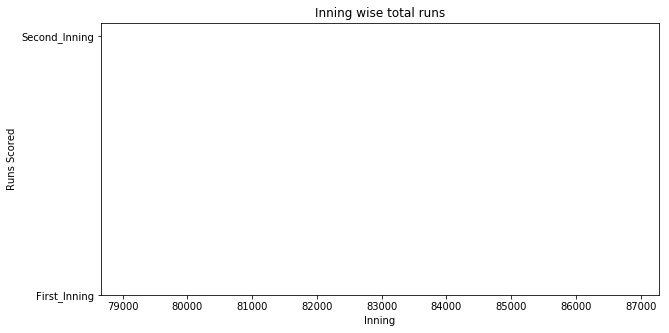

In [20]:
## To increase the display place
plt.rcParams['figure.figsize'] = [10,5]

## To plot the bar grapy vertically with xaxis is inning and yaxis is runs
plt.bar(runs_inning['Inning'],runs_inning['Runs'],width = 0.4)

## To name the xaxis, yaxis and bar-grapy
plt.xlabel('Inning')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')

## To display the grapy
plt.show()

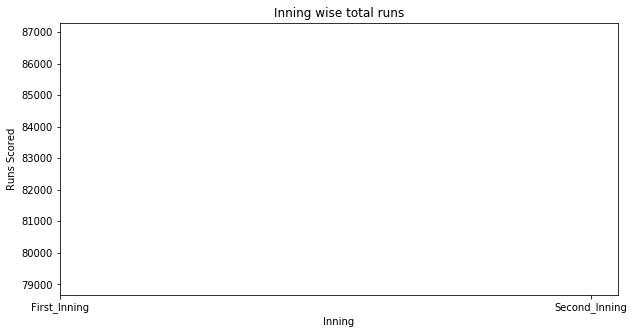

In [14]:
## To increase the display place
plt.rcParams['figure.figsize'] = [10,5]

## To plot the bar grapy horizontally with xaxis is inning and yaxis is runs
plt.barh(runs_inning['Inning'],runs_inning['Runs'],height = 0.4)

## To name the xaxis, yaxis and bar-grapy
plt.xlabel('Inning')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')

## To display the grapy
plt.show()

# PS2 -- Top 10 batsman based on runs

In [15]:
## To extact total runs scored by each batsman
batsman = ball_by_ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()

## To merge batsman and player table (to get the name of the batsman)
batsman = pd.merge(batsman,player[['Player_Id','Player_Name']],left_on='Striker_Id',right_on='Player_Id')

## Extacting the required columns
batsman = batsman[['Player_Name','Batsman_Scored']]

## Sorting the table by 'Batsman_Scored' in deascending order and getting top 10 batsman
batsman.sort_values(by = 'Batsman_Scored',ascending = False).head(10)

,Player_Name,Batsman_Scored
20,SK Raina,4106
7,V Kohli,4105
56,RG Sharma,3874
39,G Gambhir,3634
161,CH Gayle,3447
45,RV Uthappa,3390
186,DA Warner,3373
109,AB de Villiers,3270
19,MS Dhoni,3270
41,S Dhawan,3082


# PS3 -- Top 10 bowler based on extra runs

In [9]:
## To convert 'Extra_runs' column by 'ball_by_ball' table to int
bowler = ball_by_ball[['Bowler_Id','Extra_Runs']]
bowler = bowler[(bowler['Extra_Runs'] != ' ')]

## To extact total extact runs scored by each bowler
bowler =  bowler.groupby(['Bowler_Id'])['Extra_Runs'].sum().reset_index()

## To merge bowler and player table (to extact the bowler name)
bowler = pd.merge(bowler,player[['Player_Id','Player_Name']],left_on='Bowler_Id',right_on='Player_Id')

## Extacting the required columns
bowler = bowler[['Player_Name','Extra_Runs']]

## Sorting the table by 'Extra_Runs' in deascending order and getting top 10 bowlers
bowler.sort_values(by = 'Extra_Runs',ascending = False).head(10)

,Player_Name,Extra_Runs
124,SL Malinga,204
8,P Kumar,169
36,RP Singh,152
17,SR Watson,147
58,DW Steyn,141
52,I Sharma,140
28,Harbhajan Singh,132
9,Z Khan,128
66,JA Morkel,122
42,DJ Bravo,120


# PS4 -- Top 3 batsmans based on centuries

In [17]:
## Extacting total runs scored by each batsman
centuries = ball_by_ball.groupby(['Match_Id','Striker_Id'])['Batsman_Scored'].sum().reset_index()

## Extacting only centuries scored by each batsman and count the no of centuries
centuries = centuries[(centuries['Batsman_Scored'] > 99)]
centuries = centuries.groupby(['Striker_Id'])['Batsman_Scored'].count().reset_index()

## Merging centuries and player table (to get the batsman name)
centuries = pd.merge(centuries,player[['Player_Id','Player_Name']],left_on='Striker_Id',right_on='Player_Id')

## Renaming the 'Batsman_Scored' to 'No_of_centuries'
centuries = centuries.rename(columns = {'Batsman_Scored':'No_of_centuries'})

## Extacting required columns
centuries = centuries[['Player_Name','No_of_centuries']]

## Sorting the centuries table by 'No_of_centuries' column in descending order
## Extact top 3 batsman have higgest No_of_centuries
centuries.sort_values(by = 'No_of_centuries',ascending = False).head(3)

,Player_Name,No_of_centuries
19,CH Gayle,5
1,V Kohli,4
16,AB de Villiers,3


# PS5 -- Are Right handed batsman dominating IPL?

In [18]:
## Extacting the total runs scored by each batsman
right_batsman = ball_by_ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()

## Merging right_batsman and player table (to combine Batting_Hand columns)
right_batsman = pd.merge(right_batsman,player[['Player_Id','Batting_Hand']],left_on='Striker_Id',right_on='Player_Id')

## Get the required columns
right_batsman = right_batsman[['Batting_Hand','Batsman_Scored']]

## Extact the total runs scored by right_hand and left_hand batsman
right_batsman = right_batsman.groupby(['Batting_Hand'])['Batsman_Scored'].sum().reset_index()
right_batsman

,Batting_Hand,Batsman_Scored
0,Left_Hand,54462
1,Right_Hand,111488


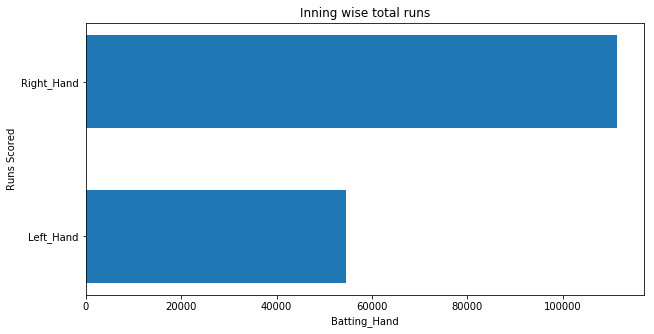

In [19]:
## Plotting the bar grapy to show whether the right_hand_batsman is dominating the IPL or not
plt.barh(right_batsman['Batting_Hand'],right_batsman['Batsman_Scored'],height = 0.6)
plt.xlabel('Batting_Hand')
plt.ylabel('Runs Scored')
plt.title('Inning wise total runs')

plt.show()

# PS -- Decision after winning the toss

In [13]:
winning_toss = match.groupby(['Toss_Decision']).size().reset_index()
winning_toss = winning_toss.rename(columns = {0:'No_of_matches'})
winning_toss

,Toss_Decision,No_of_matches
0,bat,262
1,field,315


In [14]:
from matplotlib import pyplot as plt

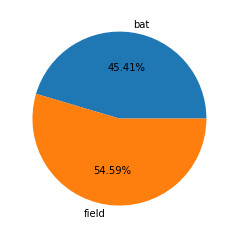

In [16]:
## Displaying the result in pie chart
plt.pie(winning_toss['No_of_matches'], labels=winning_toss['Toss_Decision'], autopct='%.2f%%')
plt.show()

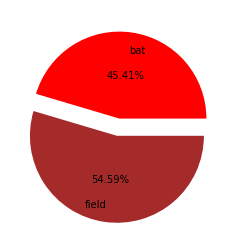

In [20]:
## Explaing the function of explode, pctdistance,labledistance

ex = (0,0.2)
color = ['red','brown']
plt.pie(winning_toss['No_of_matches'], labels=winning_toss['Toss_Decision'], autopct='%.2f%%',
        explode=ex, pctdistance=0.5, labeldistance=0.8, colors=color)
plt.show()

In [32]:
play_foriegn = player[['Player_Id','Country']]
play_foriegn = play_foriegn[(play_foriegn['Country'] != 'India')]
foriegn = ball_by_ball.groupby(['Striker_Id'])['Batsman_Scored'].sum().reset_index()
play_foriegn = pd.merge(play_foriegn,foriegn,left_on='Player_Id',right_on='Striker_Id')
play_foriegn = play_foriegn.groupby(['Country'])['Batsman_Scored'].sum().reset_index()
play_foriegn

,Country,Batsman_Scored
0,Australia,26447
1,Bangladesh,503
2,England,2943
3,Netherlands,326
4,New Zealand,5745
5,Pakistan,1107
6,South Africa,17539
7,Sri Lanka,6853
8,West Indies,11204
9,Zimbabwea,31


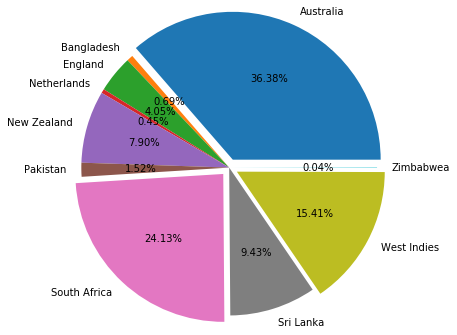

In [34]:
ex = (0.1,0,0,0,0,0,0.1,0,0.1,0)
plt.pie(play_foriegn['Batsman_Scored'], labels=play_foriegn['Country'], autopct='%.2f%%',radius=1.7,explode=ex)
plt.show()

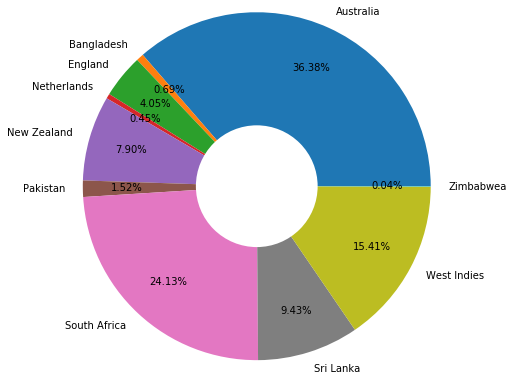

In [37]:
## Create Donut Chart

## Create a small circle

plt.pie(play_foriegn['Batsman_Scored'], labels=play_foriegn['Country'], autopct='%.2f%%',radius=2,pctdistance=0.75)
centre_circle = plt.Circle((0,0),0.7,fc='white') ## (cente,radius,fill_color)

fig = plt.gcf() ## Get current figure(i.e pie chart)
fig.gca().add_artist(centre_circle) ## Get current axis(i.e pie.axis) add circle at axis

plt.show()

In [27]:
list(team)

['Team_Id', 'Team_Name', 'Team_Short_Code']